In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import sys
sys.path.append(os.path.expanduser('~/rds/rds-dsk-lab-eWkDxBhxBrQ/dimorl/code/mopo'))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_results

In [3]:
plt.rc('font', size=12)

# MP154-MP155

In [4]:
MP134 = get_results("MP134")
MP154 = get_results("MP154")
MP155 = get_results("MP155")
MP156 = get_results("MP156")

In [5]:
np.testing.assert_array_equal(MP134.dynamics.model_loss_history.mean(axis=1), MP154.dynamics.model_loss_history.mean(axis=1))
np.testing.assert_array_equal(MP154.dynamics.model_loss_history.mean(axis=1), MP155.dynamics.model_loss_history.mean(axis=1))

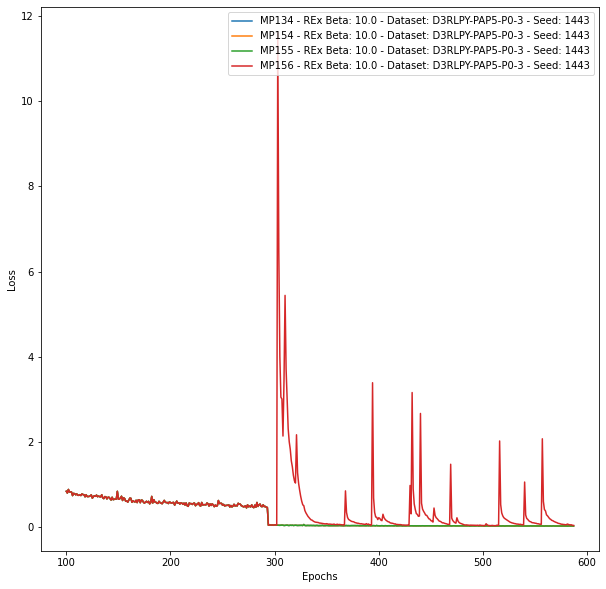

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for exp in [
    # MP100,
    MP134,
    MP154,
    MP155,
    MP156,
]:
    ax.plot(exp.dynamics.model_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
pass

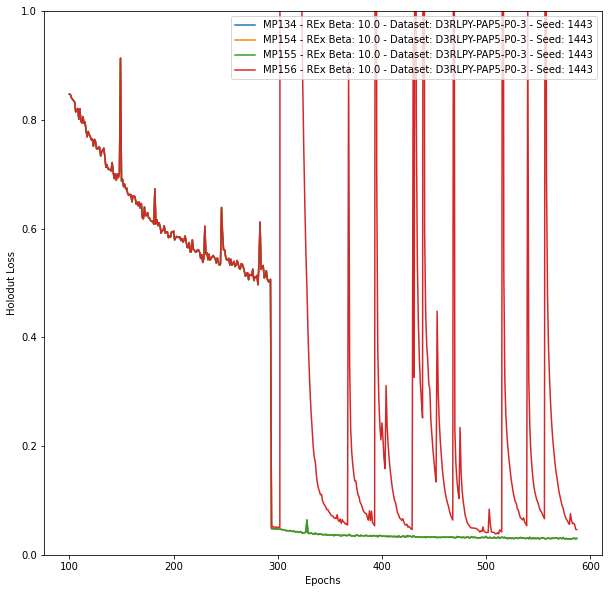

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for exp in [
    # MP100,
    MP134,
    MP154,
    MP155,
    MP156,
]:
    ax.plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
ax.set_xlabel('Epochs')
ax.set_ylabel('Holodut Loss')
ax.set_ylim(0,1.)
ax.legend()
pass

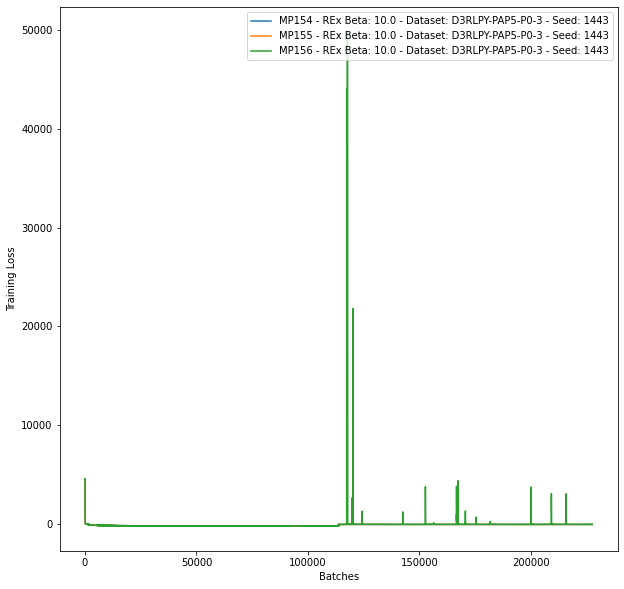

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for exp in [
    MP154,
    MP155,
    MP156,
]:
    ax.plot(exp.dynamics.model_train_loss_history, label=f'{exp.name} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
ax.set_xlabel('Batches')
ax.set_ylabel('Training Loss')
ax.legend()
pass

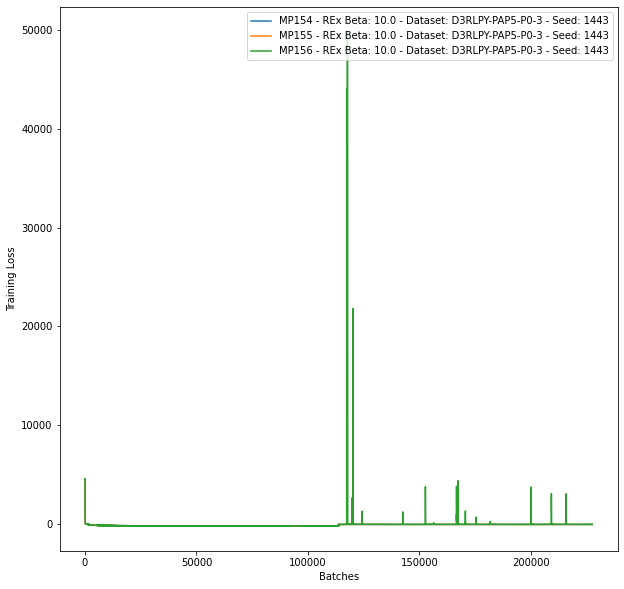

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for exp in [
    MP154,
    MP155,
    MP156,
]:
    ax.plot(exp.dynamics.model_train_loss_history, label=f'{exp.name} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
ax.set_xlabel('Batches')
ax.set_ylabel('Training Loss')
# ax.set_ylim(-200.,10.)
ax.legend()
pass

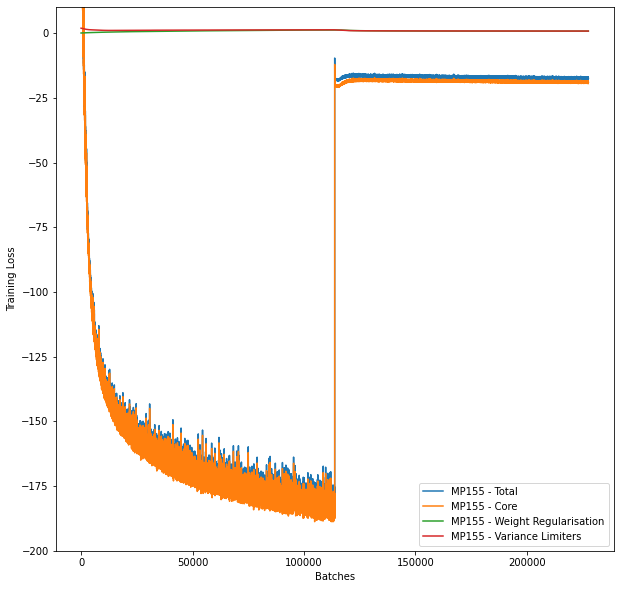

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

for exp in [
    MP155,
]:
    ax.plot(exp.dynamics.model_train_loss_history, label=f'{exp.name} - Total')
    ax.plot(exp.dynamics.model_train_core_loss_history, label=f'{exp.name} - Core')
    ax.plot(exp.dynamics.model_train_decay_loss_history, label=f'{exp.name} - Weight Regularisation')
    ax.plot(exp.dynamics.model_train_var_lim_loss_history, label=f'{exp.name} - Variance Limiters')
ax.set_xlabel('Batches')
ax.set_ylabel('Training Loss')
ax.set_ylim(-200.,10.)
ax.legend()
pass

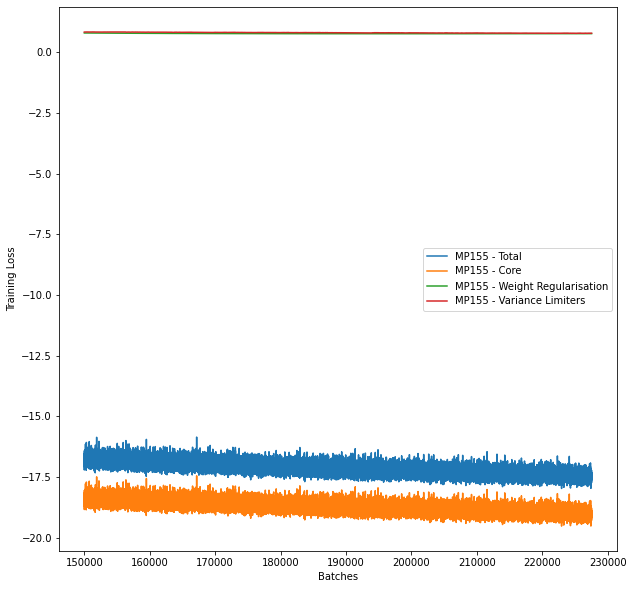

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for exp in [
    MP155,
]:
    ax.plot(exp.dynamics.model_train_loss_history[150000:], label=f'{exp.name} - Total')
    ax.plot(exp.dynamics.model_train_core_loss_history[150000:], label=f'{exp.name} - Core')
    ax.plot(exp.dynamics.model_train_decay_loss_history[150000:], label=f'{exp.name} - Weight Regularisation')
    ax.plot(exp.dynamics.model_train_var_lim_loss_history[150000:], label=f'{exp.name} - Variance Limiters')
    # ax.plot(exp.dynamics.model_train_core_loss_history[150000:] + exp.dynamics.model_train_decay_loss_history[150000:] + exp.dynamics.model_train_var_lim_loss_history[150000:], label=f'{exp.name} - Sum')
ax.set_xlabel('Batches')
ax.set_ylabel('Training Loss')
# ax.set_ylim(-25.,3.)
ax.legend()
pass

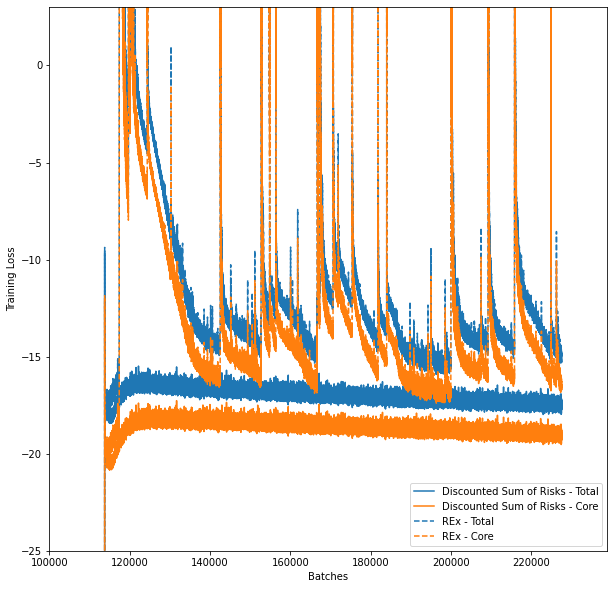

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

cols = [u'#1f77b4', u'#ff7f0e']
lss =  ['-', '--']
labels = ['Discounted Sum of Risks', 'REx']

for i, exp in enumerate([
    MP155,
    MP156,
]):
    ax.plot(exp.dynamics.model_train_loss_history, c=cols[0], ls=lss[i], label=f'{labels[i]} - Total')
    ax.plot(exp.dynamics.model_train_core_loss_history, c=cols[1], ls=lss[i], label=f'{labels[i]} - Core')
ax.set_xlabel('Batches')
ax.set_ylabel('Training Loss')
ax.set_xlim(100000)
ax.set_ylim(-25.,3.)
ax.legend()
pass

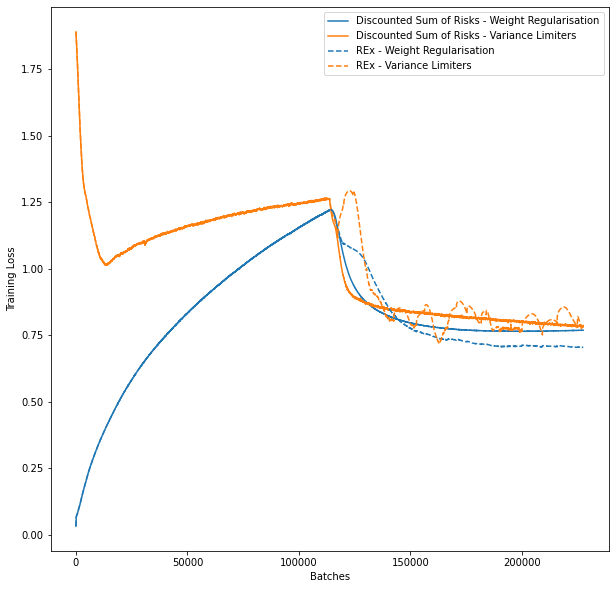

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

cols = [u'#1f77b4', u'#ff7f0e']
lss =  ['-', '--']
labels = ['Discounted Sum of Risks', 'REx']

for i, exp in enumerate([
    MP155,
    MP156,
]):
    ax.plot(exp.dynamics.model_train_decay_loss_history, c=cols[0], ls=lss[i], label=f'{labels[i]} - Weight Regularisation')
    ax.plot(exp.dynamics.model_train_var_lim_loss_history, c=cols[1], ls=lss[i], label=f'{labels[i]} - Variance Limiters')
ax.set_xlabel('Batches')
ax.set_ylabel('Training Loss')
ax.legend()
pass